In [93]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, silhouette_score
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer


In [94]:
df = pd.read_csv('../house_prices_selection.csv')
print(df.shape)
df.head()


(1460, 32)


,EVI,ZoningScore,MSZoning_RL,LotConfig_CulDSac,LandContour_HLS,LotShape_IR2,Condition1_Norm,Condition1_Feedr,LotShape_Reg,MSZoning_RM,...,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,GrLivArea,TotalBsmtSF,1stFlrSF,BsmtQual,CentralAir,Foundation
0,0.437530,0.835044,True,False,False,False,True,False,True,False,...,7,2003,2003,196.0,1710,856,856,Gd,Y,PConc
1,0.364741,0.835044,True,False,False,False,False,True,True,False,...,6,1976,1976,0.0,1262,1262,1262,Gd,Y,CBlock
2,0.411955,0.835044,True,False,False,False,True,False,False,False,...,7,2001,2002,162.0,1786,920,920,Gd,Y,PConc
3,0.394783,0.835044,True,False,False,False,True,False,False,False,...,7,1915,1970,0.0,1717,756,961,TA,Y,BrkTil
4,0.399533,0.835044,True,False,False,False,True,False,False,False,...,8,2000,2000,350.0,2198,1145,1145,Gd,Y,PConc


In [95]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
boolean_features = df.select_dtypes(include=['bool']).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)
print("Boolean Features:", boolean_features)

if 'SalePrice' in numerical_features:
    numerical_features.remove('SalePrice')

print("\n// ===== CONVERTIRE BOOLEAN =====")
for cols in boolean_features:
    df[cols] = df[cols].astype(int)

numerical_features.extend(boolean_features)
print(f"Coloane numerice (inclusiv boolean) ({len(numerical_features)}): {numerical_features}")
print(f"\nColoane categorice ({len(categorical_features)}): {categorical_features}")

Numerical Features: ['EVI', 'ZoningScore', 'Price_per_m^2', 'PDI', 'SalePrice', 'LotFrontage', 'LotArea', 'WoodDeckSF', 'OpenPorchSF', 'FullBath', 'GarageCars', 'GarageArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF']
Categorical Features: ['KitchenQual', 'PavedDrive', 'BsmtQual', 'CentralAir', 'Foundation']
Boolean Features: ['MSZoning_RL', 'LotConfig_CulDSac', 'LandContour_HLS', 'LotShape_IR2', 'Condition1_Norm', 'Condition1_Feedr', 'LotShape_Reg', 'MSZoning_RM']

// ===== CONVERTIRE BOOLEAN =====
Coloane numerice (inclusiv boolean) (26): ['EVI', 'ZoningScore', 'Price_per_m^2', 'PDI', 'LotFrontage', 'LotArea', 'WoodDeckSF', 'OpenPorchSF', 'FullBath', 'GarageCars', 'GarageArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'MSZoning_RL', 'LotConfig_CulDSac', 'LandContour_HLS', 'LotShape_IR2', 'Condition1_Norm', 'Condition1_Feedr', 'LotShape_Reg', 'MSZoning_RM']

Coloane categori

In [96]:
X = df.drop('SalePrice', axis=1)
Y = df['SalePrice']
print(f"Features shape: {X.shape}")
print(f"Target shape: {Y.shape}")

Features shape: (1460, 31)
Target shape: (1460,)


In [97]:
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=7)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_preprocessed = preprocessor.fit_transform(X)
print(f"Shape după preprocessing: {X_preprocessed.shape}")

Shape după preprocessing: (1460, 40)


K=2: Inertia=33202.57, Silhouette=0.1784
K=3: Inertia=29274.28, Silhouette=0.1815
K=4: Inertia=27498.87, Silhouette=0.1551
K=5: Inertia=25938.72, Silhouette=0.1670
K=6: Inertia=24521.81, Silhouette=0.1715
K=7: Inertia=23347.46, Silhouette=0.1536
K=8: Inertia=22244.47, Silhouette=0.1736
K=9: Inertia=21246.52, Silhouette=0.1753
K=10: Inertia=20277.65, Silhouette=0.1851
K=11: Inertia=19629.58, Silhouette=0.1582
K=12: Inertia=19281.62, Silhouette=0.1341
K=13: Inertia=18332.09, Silhouette=0.1514
K=14: Inertia=18132.89, Silhouette=0.1500
K=15: Inertia=17702.72, Silhouette=0.1509
K=16: Inertia=17464.45, Silhouette=0.1340
K=17: Inertia=17209.87, Silhouette=0.1327
K=18: Inertia=17046.27, Silhouette=0.1167
K=19: Inertia=16657.68, Silhouette=0.1450


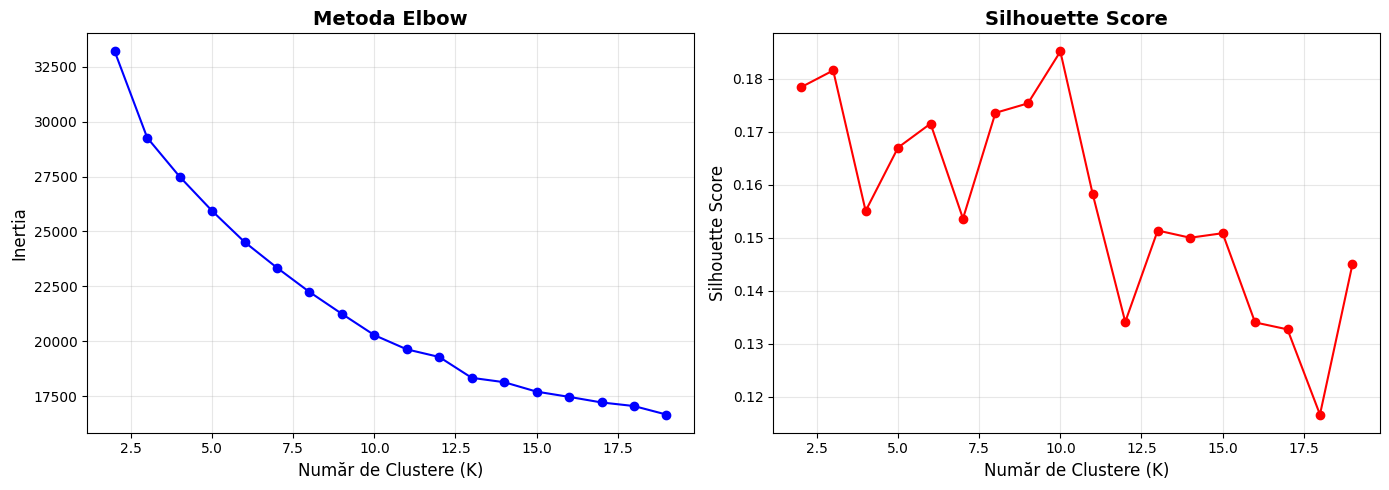

In [98]:
inertia_values = []
silhouette_scores = []
K_range = range(2, 20)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_preprocessed)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_preprocessed, kmeans.labels_))
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette_scores[-1]:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range, inertia_values, 'bo-')
axes[0].set_xlabel('Număr de Clustere (K)', fontsize=12)
axes[0].set_ylabel('Inertia', fontsize=12)
axes[0].set_title('Metoda Elbow', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].plot(K_range, silhouette_scores, 'ro-')
axes[1].set_xlabel('Număr de Clustere (K)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [99]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_preprocessed)

df['ClusterLabel'] = cluster_labels

print(f"\nDistribuția clusterelor:")
print(pd.Series(cluster_labels).value_counts().sort_index())

print(f"\nStatistici SalePrice pe clustere:")
cluster_stats = df.groupby('ClusterLabel')['SalePrice'].describe()
print(cluster_stats)


Distribuția clusterelor:
0    613
1    608
2    239
Name: count, dtype: int64

Statistici SalePrice pe clustere:
              count           mean           std       min       25%  \
ClusterLabel                                                           
0             613.0  141964.137031  33598.383555   39300.0  122900.0   
1             608.0  243901.557566  80929.790264  124000.0  187500.0   
2             239.0  120622.523013  37263.107275   34900.0   97500.0   

                   50%       75%       max  
ClusterLabel                                
0             139900.0  159500.0  311500.0  
1             223250.0  275000.0  755000.0  
2             119900.0  140000.0  325000.0  


In [100]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_preprocessed)

df['ClusterLabel'] = cluster_labels

print(f"\nDistribuția clusterelor:")
print(pd.Series(cluster_labels).value_counts().sort_index())

print(f"\nStatistici SalePrice pe clustere:")
cluster_stats = df.groupby('ClusterLabel')['SalePrice'].describe()
print(cluster_stats)


Distribuția clusterelor:
0    275
1    359
2    589
3    237
Name: count, dtype: int64

Statistici SalePrice pe clustere:
              count           mean           std       min       25%  \
ClusterLabel                                                           
0             275.0  290734.610909  93506.519209  110000.0  230000.0   
1             359.0  203527.629526  39235.492056  127500.0  177250.0   
2             589.0  140777.123939  33158.832960   39300.0  121000.0   
3             237.0  119024.400844  33043.972162   34900.0   97000.0   

                   50%       75%       max  
ClusterLabel                                
0             274970.0  325812.0  755000.0  
1             194000.0  224700.0  392500.0  
2             139000.0  158000.0  311500.0  
3             119500.0  139400.0  265979.0  


In [101]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_preprocessed)

df['ClusterLabel'] = cluster_labels

print(f"\nDistribuția clusterelor:")
print(pd.Series(cluster_labels).value_counts().sort_index())

print(f"\nStatistici SalePrice pe clustere:")
cluster_stats = df.groupby('ClusterLabel')['SalePrice'].describe()
print(cluster_stats)


Distribuția clusterelor:
0     80
1    353
2    221
3    541
4    265
Name: count, dtype: int64

Statistici SalePrice pe clustere:
              count           mean           std       min       25%  \
ClusterLabel                                                           
0              80.0  142256.425000  42376.853783   40000.0  120825.0   
1             353.0  203953.028329  39319.768617  127500.0  177500.0   
2             221.0  119811.687783  32300.108699   34900.0  100000.0   
3             541.0  141072.347505  33670.139000   39300.0  120500.0   
4             265.0  294228.264151  93068.598507  129000.0  232000.0   

                   50%       75%       max  
ClusterLabel                                
0             139500.0  167750.0  244600.0  
1             194201.0  225000.0  392500.0  
2             119900.0  139400.0  265979.0  
3             139000.0  158500.0  311500.0  
4             279500.0  335000.0  755000.0  


In [102]:
df_classification = df.drop('SalePrice', axis=1)
X_class = df_classification.drop('ClusterLabel', axis=1)
Y_class = df_classification['ClusterLabel']

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split( X_class, Y_class, test_size=0.2, random_state=42, stratify=Y_class)

print(f"\nTrain set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nDistribuție train:\n{Y_train.value_counts().sort_index()}")
print(f"\nDistribuție test:\n{Y_test.value_counts().sort_index()}")


Train set: (1168, 31)
Test set: (292, 31)

Distribuție train:
ClusterLabel
0     64
1    282
2    177
3    433
4    212
Name: count, dtype: int64

Distribuție test:
ClusterLabel
0     16
1     71
2     44
3    108
4     53
Name: count, dtype: int64


In [104]:
numerical_transformer_clf = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=7))
])

categorical_transformer_clf = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor_clf = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_clf, numerical_features),
        ('cat', categorical_transformer_clf, categorical_features)
    ])

In [105]:
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor_clf),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

param_grid_dt = {
    'classifier__max_depth': [5, 10, 15, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

cv_scores = cross_val_score(pipeline_dt, X_train, Y_train, cv=5, scoring='accuracy')
print(f"   CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

grid_search_dt = GridSearchCV( pipeline_dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1, verbose=1 )

grid_search_dt.fit(X_train, Y_train)

print(f"\n   Best CV Accuracy: {grid_search_dt.best_score_:.4f}")
y_pred = grid_search_dt.predict(X_test)


accuracy = accuracy_score(Y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(Y_test, y_pred))

c:\Users\dariu\Documents\GithubRepos\house-price-prediction-integra\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


   CV Accuracy: 0.8956 (+/- 0.0130)
Fitting 5 folds for each of 90 candidates, totalling 450 fits

   Best CV Accuracy: 0.8956
Test Accuracy: 0.9007

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.87      0.83      0.85        71
           2       1.00      0.98      0.99        44
           3       0.94      0.94      0.94       108
           4       0.76      0.85      0.80        53

    accuracy                           0.90       292
   macro avg       0.91      0.91      0.91       292
weighted avg       0.90      0.90      0.90       292



| Metric | K=3 | K=4 | K=5 |
|--------|-----|-----|-----|
| **CV Accuracy (mean)** | 0.9512 | 0.8904 | 0.8956 |
| **CV Accuracy (std)** | ±0.0147 | ±0.0170 | ±0.0130 |
| **Best CV Accuracy** | 0.9521 | 0.9058 | 0.8956 |
| **Test Accuracy** | **0.9452** | 0.8904 | 0.9007 |
| **GridSearch Combinations** | 450 fits | 450 fits | 450 fits |

---

## K=3 Clustere - Rezultate Detaliate

| Cluster | Precision | Recall | F1-Score | Support |
|---------|-----------|--------|----------|---------|
| 0 | 0.92 | 0.96 | 0.94 | 123 |
| 1 | 0.96 | 0.91 | 0.93 | 121 |
| 2 | **0.98** | **1.00** | **0.99** | 48 |
| **Accuracy** | - | - | **0.95** | 292 |
| **Macro avg** | 0.95 | 0.96 | 0.95 | 292 |
| **Weighted avg** | 0.95 | 0.95 | 0.95 | 292 |

---

## K=4 Clustere - Rezultate Detaliate

| Cluster | Precision | Recall | F1-Score | Support |
|---------|-----------|--------|----------|---------|
| 0 | 0.82 | 0.82 | 0.82 | 55 |
| 1 | 0.88 | 0.81 | 0.84 | 72 |
| 2 | 0.89 | 0.93 | 0.91 | 118 |
| 3 | **1.00** | **1.00** | **1.00** | 47 |
| **Accuracy** | - | - | **0.89** | 292 |
| **Macro avg** | 0.90 | 0.89 | 0.89 | 292 |
| **Weighted avg** | 0.89 | 0.89 | 0.89 | 292 |

---

## K=5 Clustere - Rezultate Detaliate

| Cluster | Precision | Recall | F1-Score | Support |
|---------|-----------|--------|----------|---------|
| 0 | **1.00** | 0.94 | 0.97 | 16 |
| 1 | 0.87 | 0.83 | 0.85 | 71 |
| 2 | **1.00** | 0.98 | 0.99 | 44 |
| 3 | 0.94 | 0.94 | 0.94 | 108 |
| 4 | 0.76 | 0.85 | 0.80 | 53 |
| **Accuracy** | - | - | **0.90** | 292 |
| **Macro avg** | 0.91 | 0.91 | 0.91 | 292 |
| **Weighted avg** | 0.90 | 0.90 | 0.90 | 292 |

